# Get started

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
FILE_PATH = '/content/drive/MyDrive/UTS_Materials/Statistical_Thinking/TeleCom_Data-1.csv'

In [4]:
import pandas as pd
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# process text data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# nltk.download('punkt')

# Read raw dataset

In [5]:
def format_row(row):
    # format row in the raw data file
    row = row[0]
    row = row.replace('"','')
    row = row.split(';')
    return row

def read_raw_data(file_path='TeleCom_Data-1.csv'):
    '''
    since the raw csv file cannot be read directly by the pandas read_csv function,
    we need to read it in another way and return a dataframe from it.
    '''
    with open(file_path, newline='') as f:
        # data is a list, each element is a row from the file, each row is a list with len 1
        data = csv.reader(f)

        # read the first
        header = next(data)
        header = format_row(header)

        new_data = []

        for row in data:
            row = format_row(row)
            new_data.append(row)

        # create a dict with keys are headers and values are columns
        data_dict = defaultdict(list)

        for row in new_data:
            for i in range(len(row)):
                data_dict[header[i]].append(row[i])

    return pd.DataFrame(data=data_dict)

# read generated data
df = read_raw_data(file_path=FILE_PATH)

# Understanding the data

## Data description

In [6]:
# data shape
print('Data shape: ', df.shape)

# see 5 first data samples
df.head(5)

Data shape:  (41180, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


There are **41,180 samples** with **21 features** in total.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41180 non-null  object
 1   job             41180 non-null  object
 2   marital         41180 non-null  object
 3   education       41180 non-null  object
 4   default         41180 non-null  object
 5   housing         41180 non-null  object
 6   loan            41180 non-null  object
 7   contact         41180 non-null  object
 8   month           41180 non-null  object
 9   day_of_week     41180 non-null  object
 10  duration        41180 non-null  object
 11  campaign        41180 non-null  object
 12  pdays           41180 non-null  object
 13  previous        41180 non-null  object
 14  poutcome        41180 non-null  object
 15  emp.var.rate    41180 non-null  object
 16  cons.price.idx  41180 non-null  object
 17  cons.conf.idx   41180 non-null  object
 18  euribo

To be more specific, there are **10 numeric features** and **11 categorical features**. These features can be shortly described as below:
- **age**: Age
- **job**: Job
- **martial**: Martial status
- **education**: Education
- **default**: Has credit in default
- **housing**: Has a housing loan
- **loan**: Has a personal loan
- **contact**: Contact communication type
- **day**: Day of contact in the week
- **month**: Month of contact
- **duration**: Last contact duration, in seconds (numeric). This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
- **campaign**: Number of contacts performed during this campaign and for this client
- **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- **previous**: Number of contacts performed before this campaign and for this client
- **poutcome**: Outcome of the previous marketing campaign
- **emp.var.rate**: Employment variation rate - quarterly indicator (numeric). Positive values of the employment variation rate suggest an increase in employment, while negative values indicate a decrease.
- **cons.price.idx**: Consumer price index - monthly indicator (numeric). It measures the average change over time in the prices paid by urban consumers for a basket of goods and services. It is used to gauge inflation and assess the general trend in price levels in an economy.
- **cons.conf.idx**: Consumer confidence index - monthly indicator (numeric). It measures the level of confidence and optimism that consumers have about the overall state of the economy and their personal financial situations.
- **euribor3m**: Euribor 3 month rate - daily indicator (numeric). It represents the average interest rate at which a panel of major European banks is willing to lend unsecured funds to other banks in the eurozone wholesale money market for a 3-month period.
- **nr.employed**: Number employed - quarterly indicator (numeric). It refers to the number of employed individuals or the total number of employed people in a given dataset or context.
- **y**: Did the client subscribe to the campaign ?

In [8]:
# describe the data
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180,...,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180
unique,78,12,4,8,3,3,3,2,10,5,...,42,27,8,3,10,26,26,316,11,2
top,31,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,1947,10422,24921,12166,32581,21571,33943,26140,13765,8622,...,17637,39667,35559,35559,16234,7759,7759,2864,16234,36542


## Data cleaning and Univariate analysis



### General data cleaning

#### Finding missing values

In [9]:
# check missing values
df.isna().sum().sort_values(ascending=False).head(10)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
dtype: int64

As can be seen from above, there are **no missing values** in the dataset.

#### Finding duplicate values

In [10]:
# check duplicate samples
duplicate = df[df.duplicated()]

print('Number of duplicate samples:', len(duplicate))

Number of duplicate samples: 12


In [11]:
# drop duplicate samples
df = df.drop_duplicates(keep='first')

print('Number of duplicate samples:', len(df[df.duplicated()]))
print('Number of samples after removing duplicate samples:', len(df))

Number of duplicate samples: 0
Number of samples after removing duplicate samples: 41168


There are **12 duplicated samples** in the dataset. After removing these samples, the dataset ends up with **41,168 samples** in total.

#### Separating features

In [12]:
# seperate categorical feats and numeric feats

cate_cols = ["job", "marital", "education", "default", "housing", "loan",
              "contact", "month", "day_of_week", "poutcome", "y"]

numeric_cols = [feat for feat in df.columns if feat not in cate_cols]

print(f'Number of categorical columns: {len(cate_cols)}\n', cate_cols)
print()
print(f'Number of numeric columns: {len(numeric_cols)}\n', numeric_cols)

Number of categorical columns: 11
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Number of numeric columns: 10
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Numeric (Continuous) Features Analysis

#### Cleaning

In [13]:
# convert numeric data to the right format
for col in numeric_cols:
  df[col] = df[col].astype('float32')

#### Distribution analysis

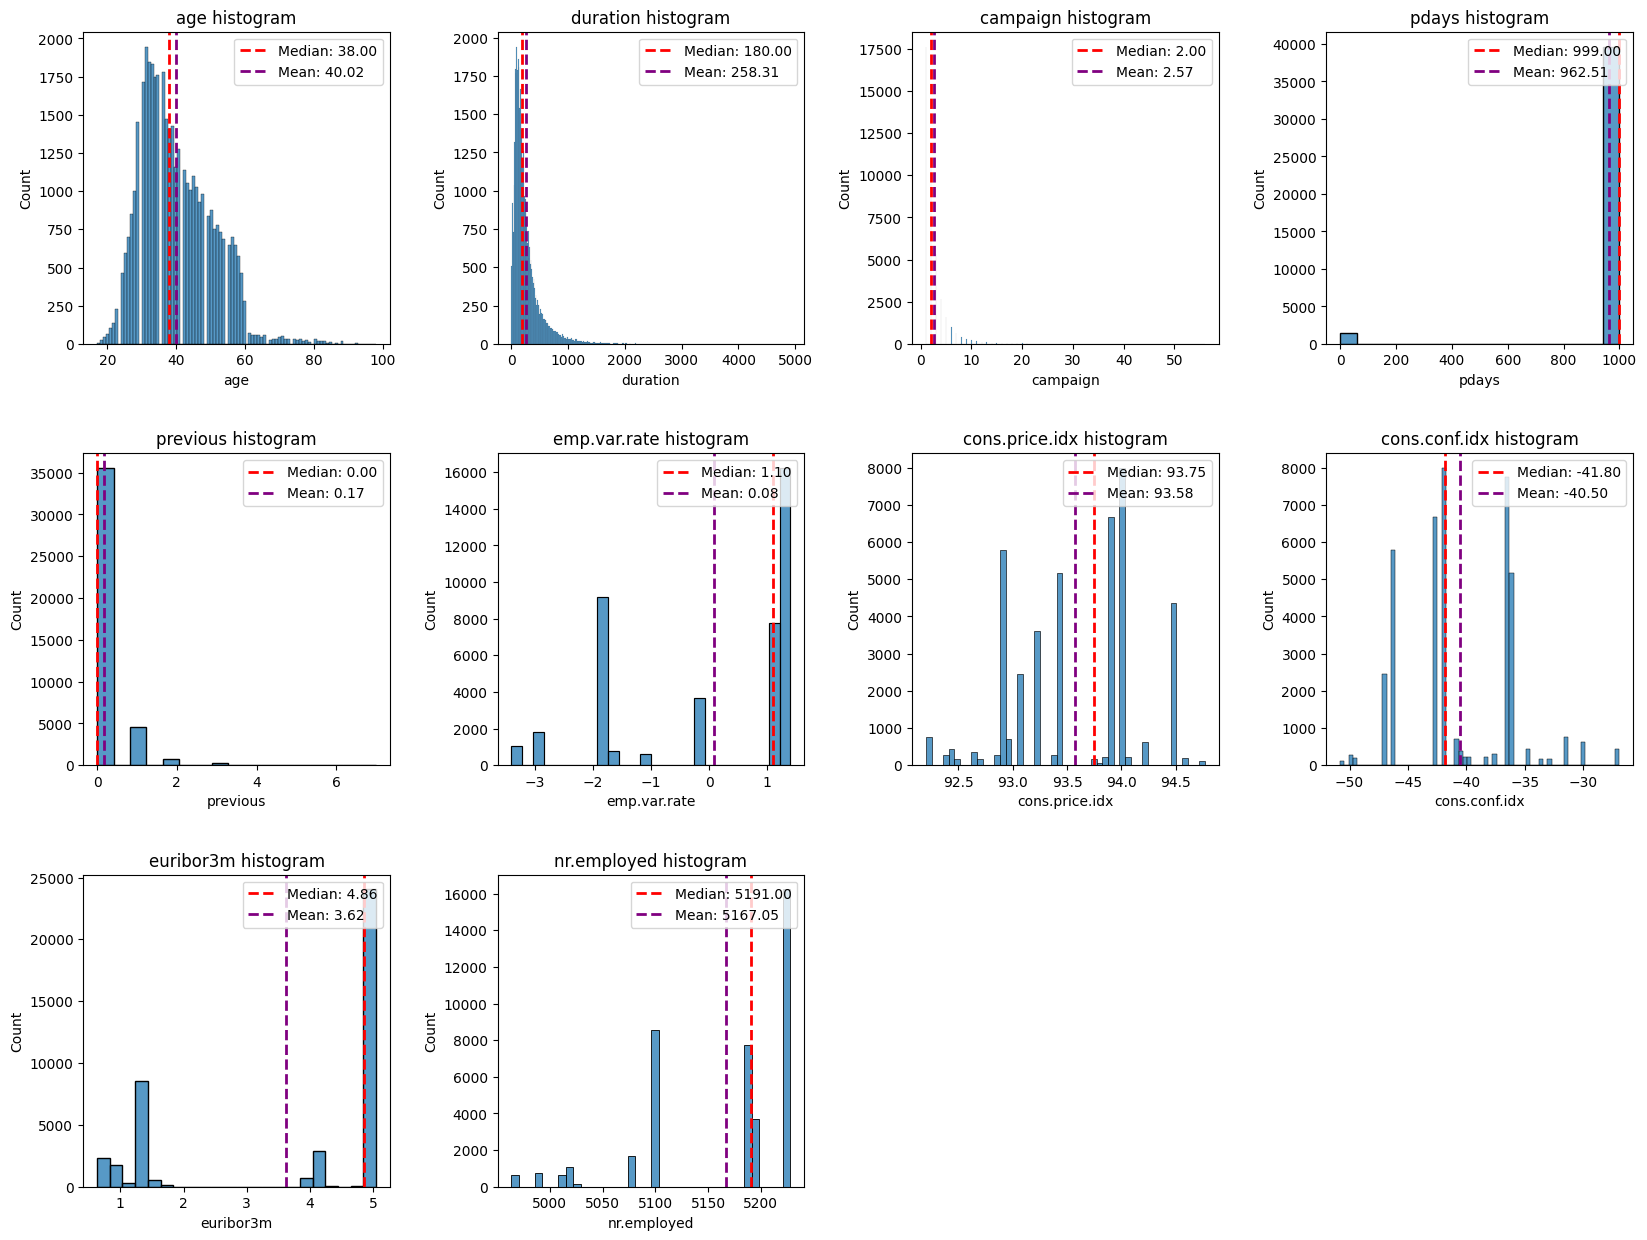

In [14]:
'''
Number of rows to plot. We will plot 4 figures in a row.
'''
num_cols = 4
num_rows = math.ceil(len(numeric_cols) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize = (5*num_cols,5*num_rows))

row_idx = 0
col_idx = 0

for col in numeric_cols:
  # move to next row
  if col_idx == num_cols:
    row_idx += 1
    col_idx = 0

  # plot figure
  sns.histplot(ax=axes[row_idx, col_idx], data=df[col])

  # add median line
  axes[row_idx, col_idx].axvline(x=df[col].median(),
            color='red',
            ls='--',
            lw=2.0,
            label = "Median: {:.2f}".format(df[col].median()))
  axes[row_idx, col_idx].legend(loc='upper right')

  # add mean line
  axes[row_idx, col_idx].axvline(x=df[col].mean(),
            color='purple',
            ls='--',
            lw=2.0,
            label = "Mean: {:.2f}".format(df[col].mean()))
  axes[row_idx, col_idx].legend(loc='upper right')

  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} histogram')
  # add note
  # plot in next column
  col_idx += 1

# adjust distance between figures
plt.subplots_adjust(wspace=0.35,
                    hspace=0.35)

fig.delaxes(axes[2,2])
fig.delaxes(axes[2,3])

plt.show()

Based on the distribution above, we can conclude some points about the dataset:
- The customers of the campaigns are average around 40 year old. *(from **age** feature)*

- Most of the customers were connected 2-3 times during this campaigns, with the average duration is around 3-4 minutes. *(from **duration** and **campaign** features)*

- Almost customers are reconnected after nearly 3 years and were not interacted in the previous campaign, since most of them were not contacted in the previous campaign. *(from **pdays** and **previous** features)*

- During the campaign occured, the economic situation was not optimistic. There was a decrease in employment demand. The price was also deflated, which indicate an economic slowdown. All of these trends could be the reasons for customers' pessimism about the economy and personal financial. *(from **emp.var.rate**, **cons.price.idx** and **cons.conf.idx** features)*

#### Identifying outliers

First we will visualize numeric features using histogram and boxplot to check outliers

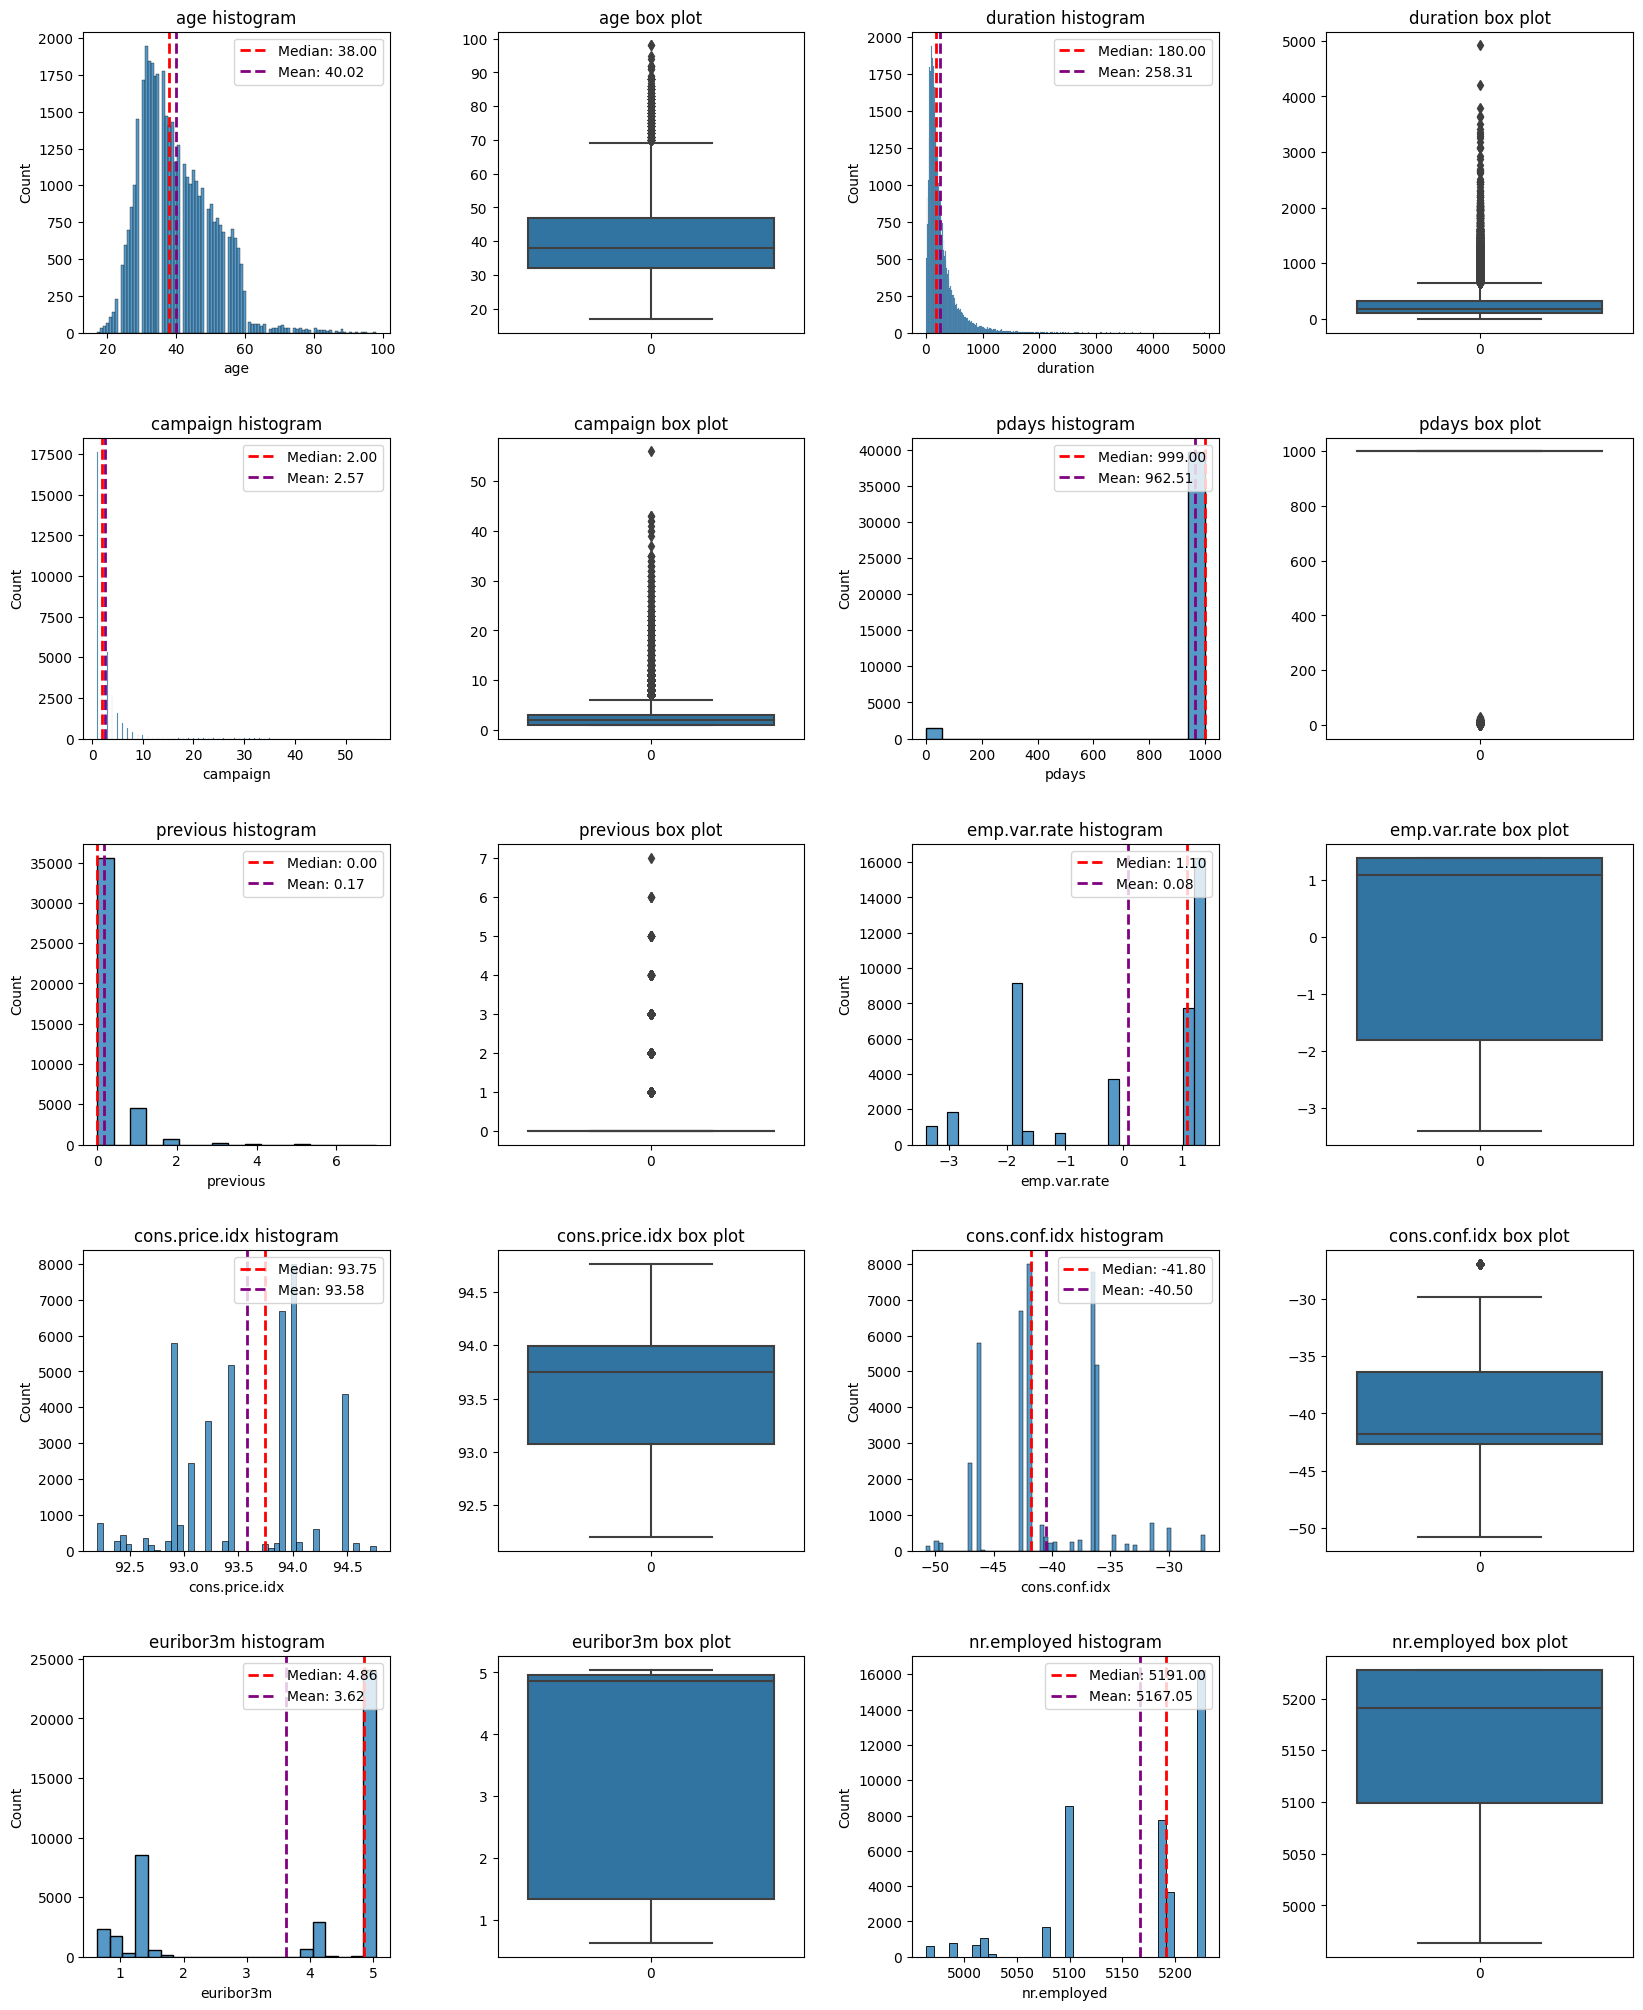

In [15]:
'''
Number of rows to plot. We will plot 3 figures in a row.
'''
num_cols = 4
num_rows = math.ceil(len(numeric_cols) / num_cols * 2)

fig, axes = plt.subplots(num_rows, num_cols, figsize = (20,5*num_rows))

row_idx = 0
col_idx = 0

for col in numeric_cols:
  # move to next row
  if col_idx == num_cols:
    row_idx += 1
    col_idx = 0

  # plot figure
  sns.histplot(ax=axes[row_idx, col_idx], data=df[col])
  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} histogram')

  # add median line
  axes[row_idx, col_idx].axvline(x=df[col].median(),
            color='red',
            ls='--',
            lw=2.0,
            label = "Median: {:.2f}".format(df[col].median()))
  axes[row_idx, col_idx].legend(loc='upper right')

  # add mean line
  axes[row_idx, col_idx].axvline(x=df[col].mean(),
            color='purple',
            ls='--',
            lw=2.0,
            label = "Mean: {:.2f}".format(df[col].mean()))
  axes[row_idx, col_idx].legend(loc='upper right')

  col_idx += 1

  # plot figure
  sns.boxplot(ax=axes[row_idx, col_idx], data=df[col])
  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} box plot')

  col_idx += 1

# adjust distance between figures
plt.subplots_adjust(wspace=0.35,
                    hspace=0.35)
plt.show()

The above figures display every numeric feature histograms and boxplots in sequence.

As can be seen from above, the large gap between mean and median, the heavier outliers. They are determined in 6 features, namely **age**, **duration**, **campaign**, **pdays**, **previous** and **cons.conf.idx**.

We can calculate the percentage of outliers for each numeric feature using IQR (interquartile) method. Basically, it will treat points out of the range **[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]** as outliers.

Since the **age** and **duration** are skewed distributed, we will use log transform on these feature to only detect very sensitive points as outliers.

In [16]:
# Calculate the percentage of outliers using IQR method

def count_outliers(df, col, method='IQR'):
  if col == 'age' or col == 'duration':
    q1, q3 = np.log(df[col]).quantile(.25), np.log(df[col]).quantile(.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    # outliers = df[(np.log(df[col]) < lower_bound) | (np.log(df[col]) > upper_bound)]
    under_outliers = df[(np.log(df[col]) < lower_bound)]
    upper_outliers = df[(np.log(df[col]) > upper_bound)]

    return math.exp(lower_bound), math.exp(upper_bound), len(under_outliers), len(upper_outliers)
  else:
    q1, q3 = df[col].quantile(.25), df[col].quantile(.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    # outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    under_outliers = df[(df[col] < lower_bound)]
    upper_outliers = df[(df[col] > upper_bound)]

    return lower_bound, upper_bound, len(under_outliers), len(upper_outliers)

data_len = len(df)

for col in numeric_cols:
  lower, upper, under_outliers, upper_outliers = count_outliers(df, col)
  # print(f'{col} outliers percent is {outliers_percent}% with lower bound {lower} and upper bound {upper}')
  print(f'{col} feature: \n Lower: {round(lower, 2)} \t Upper: {round(upper, 2)} \t Under outliers percent: {round(under_outliers/data_len*100, 2)}% \t Upper outliers percent: {round(upper_outliers/data_len*100, 2)}%\n')

age feature: 
 Lower: 17.98 	 Upper: 83.66 	 Under outliers percent: 0.01% 	 Upper outliers percent: 0.16%

duration feature: 
 Lower: 18.44 	 Upper: 1764.32 	 Under outliers percent: 2.34% 	 Upper outliers percent: 0.26%

campaign feature: 
 Lower: -2.0 	 Upper: 6.0 	 Under outliers percent: 0.0% 	 Upper outliers percent: 5.84%

pdays feature: 
 Lower: 999.0 	 Upper: 999.0 	 Under outliers percent: 3.68% 	 Upper outliers percent: 0.0%

previous feature: 
 Lower: 0.0 	 Upper: 0.0 	 Under outliers percent: 0.0% 	 Upper outliers percent: 13.65%

emp.var.rate feature: 
 Lower: -6.6 	 Upper: 6.2 	 Under outliers percent: 0.0% 	 Upper outliers percent: 0.0%

cons.price.idx feature: 
 Lower: 91.7 	 Upper: 95.37 	 Under outliers percent: 0.0% 	 Upper outliers percent: 0.0%

cons.conf.idx feature: 
 Lower: -52.15 	 Upper: -26.95 	 Under outliers percent: 0.0% 	 Upper outliers percent: 1.08%

euribor3m feature: 
 Lower: -4.08 	 Upper: 10.39 	 Under outliers percent: 0.0% 	 Upper outliers percen

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Since we are not sure whether they are **truely outliers**, we will still keep these points for further analysis.


### Categorical features analysis

#### Distribution analysis

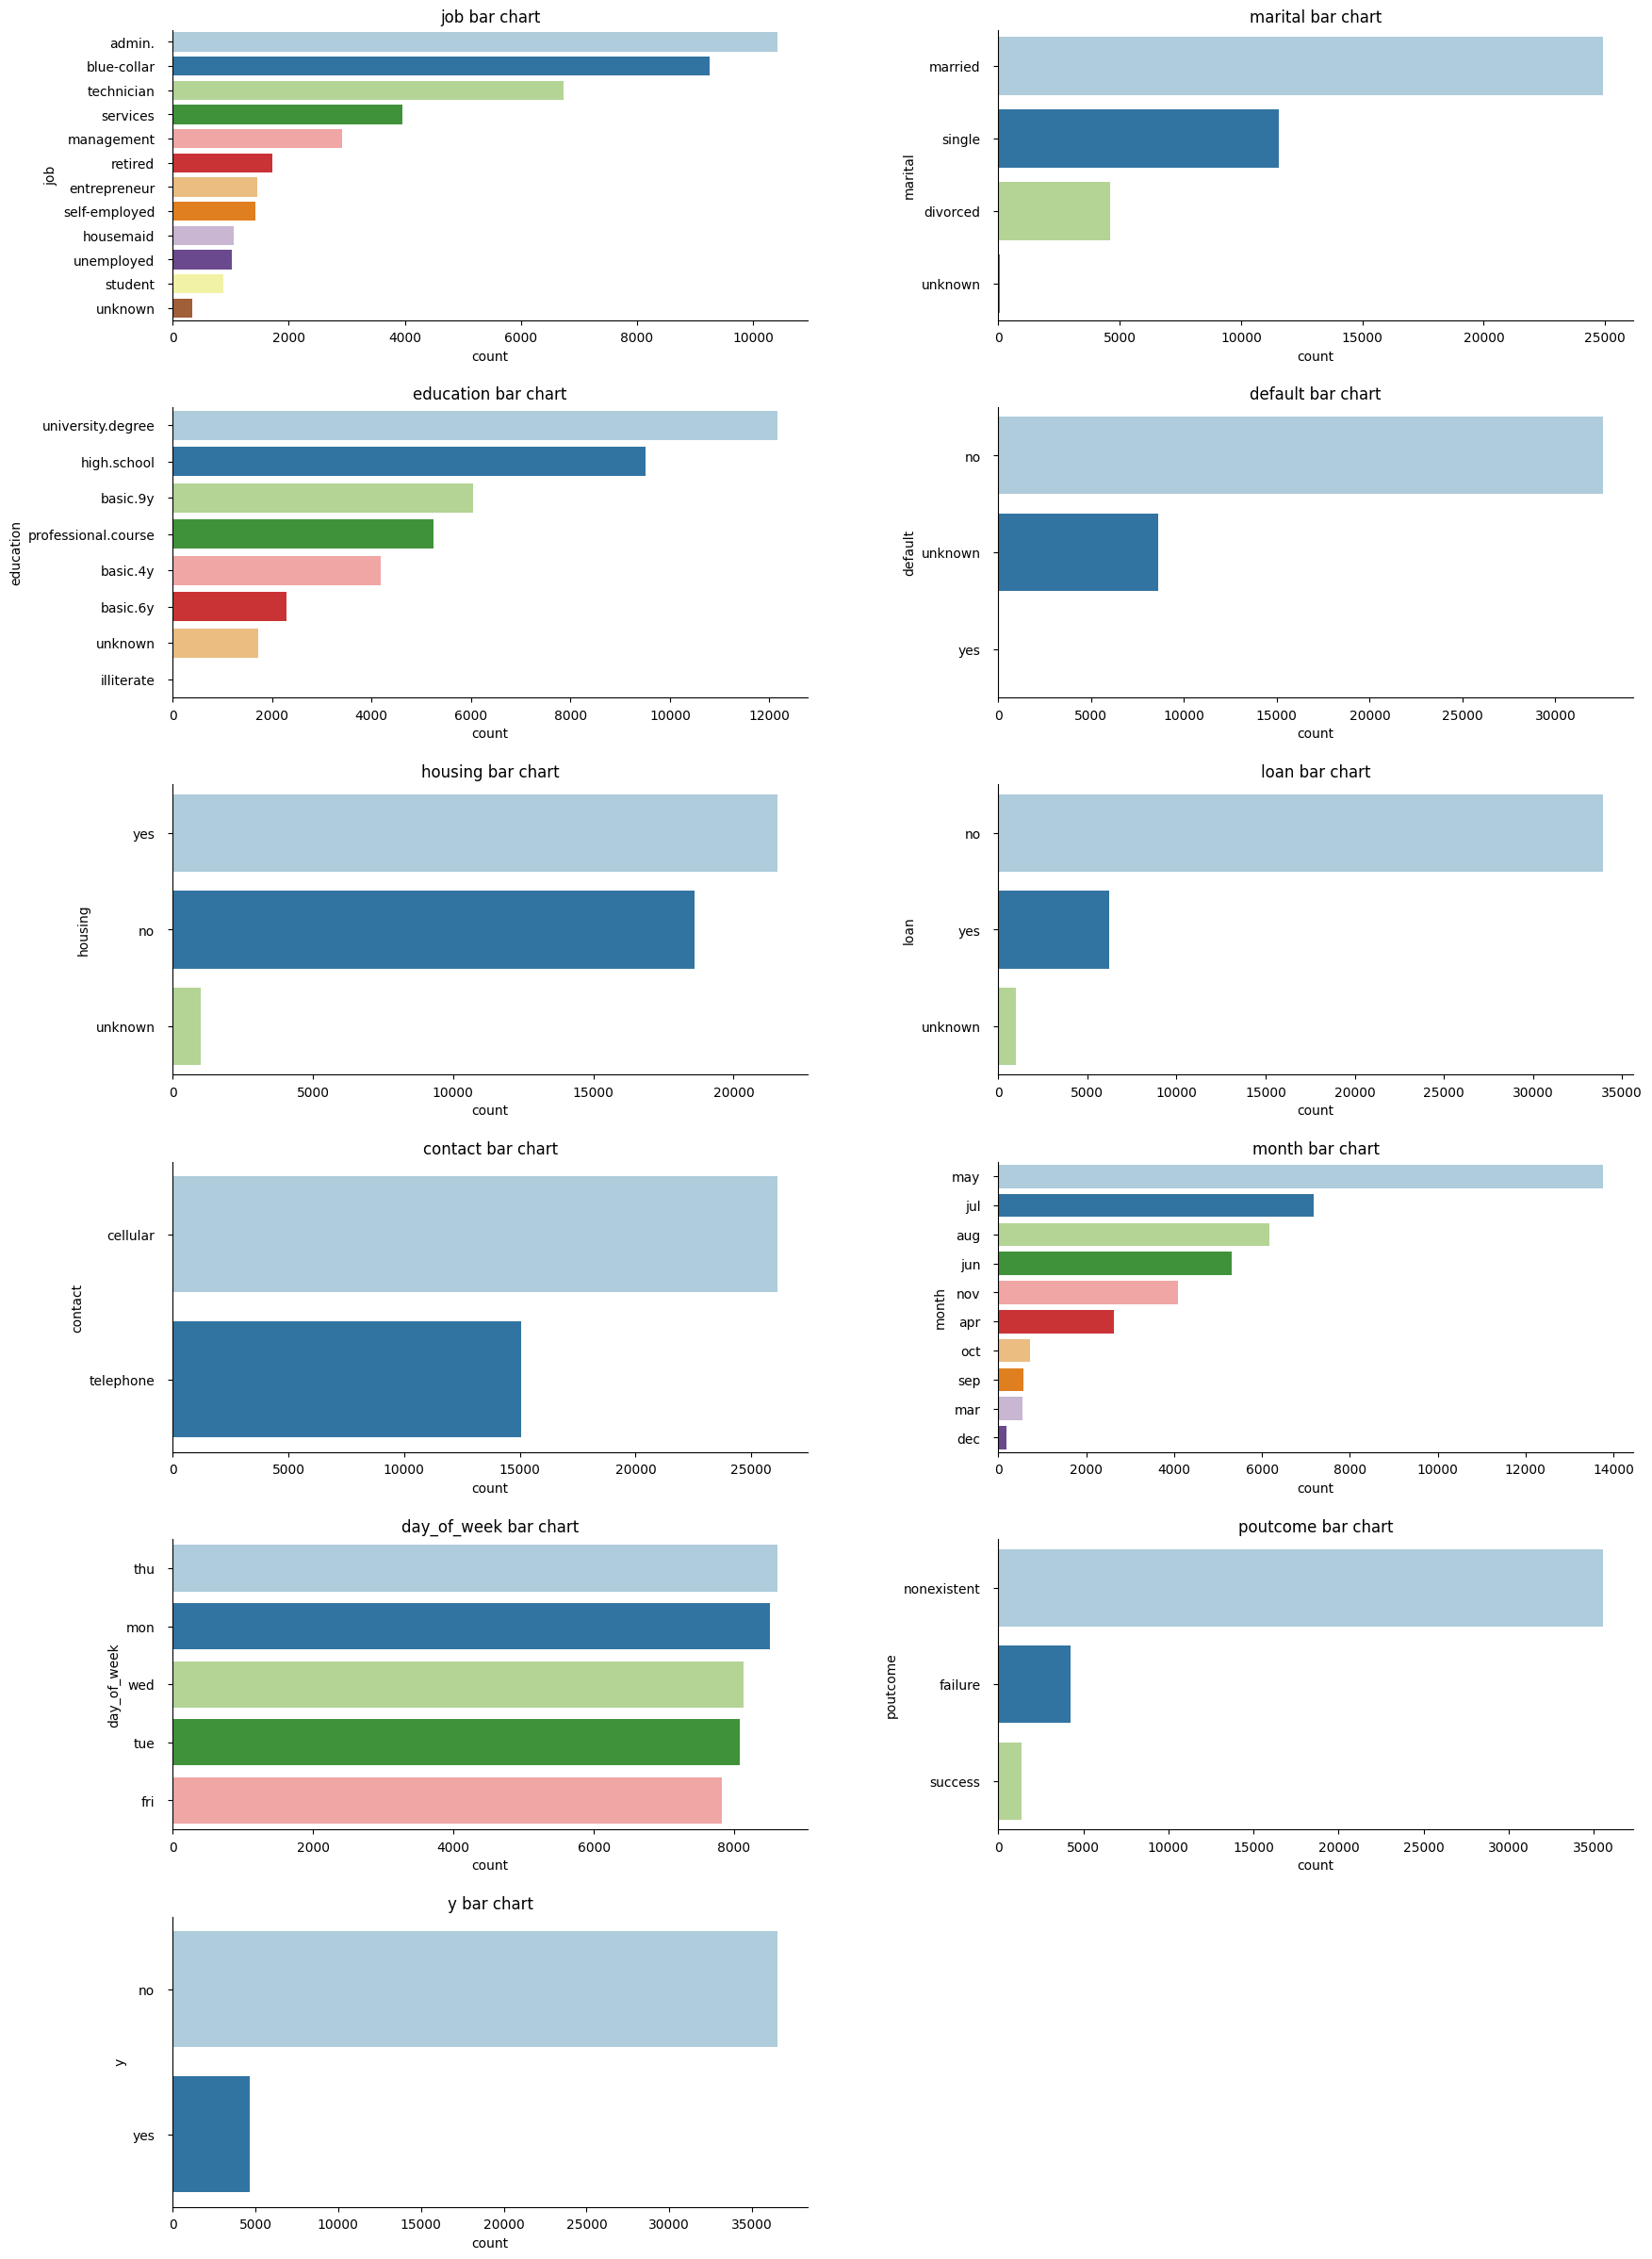

In [17]:
'''
Number of rows to plot. We will plot 4 figures in a row.
'''
num_cols = 2
num_rows = math.ceil(len(cate_cols) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize = (10*num_cols,5*num_rows))

row_idx = 0
col_idx = 0

for col in cate_cols:
  # move to next row
  if col_idx == num_cols:
    row_idx += 1
    col_idx = 0

  # plot figure
  color_palette = sns.color_palette("Paired")

  sns.countplot(ax=axes[row_idx, col_idx], data=df, y=col,
                order=df[col].value_counts().index,
                palette=color_palette)

  # Remove axes splines
  for s in ['top', 'right']:
      axes[row_idx, col_idx].spines[s].set_visible(False)

  # # Remove x, y Ticks
  # ax.xaxis.set_ticks_position('none')
  # ax.yaxis.set_ticks_position('none')

  # Add padding between axes and labels
  axes[row_idx, col_idx].xaxis.set_tick_params(pad = 5)
  axes[row_idx, col_idx].yaxis.set_tick_params(pad = 10)

  # Add x, y gridlines
  # axes[row_idx, col_idx].grid(color ='grey',
  #         linestyle ='-.', linewidth = 0.5,
  #         alpha = 0.3)

  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} bar chart')
  # add note
  # plot in next column
  col_idx += 1

# adjust distance between figures
plt.subplots_adjust(wspace=0.3,
                    hspace=0.3)

fig.delaxes(axes[5,1])

plt.show()

#### Cleaning data

Since the text features are simple and have few categories, we only need to remove some basic symbols and lower-casing for further usage

In [18]:
def clean_text(text):
  seps = ['.', '-']
  text = text.lower()

  for sep in seps:
    text = text.replace(sep, ' ')

  return text

for col in cate_cols:
  df[col] = df[col].apply(clean_text)
  print(f'{col} unique values: \t {list(df[col].unique())}')

job unique values: 	 ['admin ', 'services', 'blue collar', 'technician', 'housemaid', 'retired', 'management', 'unemployed', 'self employed', 'unknown', 'entrepreneur', 'student']
marital unique values: 	 ['married', 'single', 'divorced', 'unknown']
education unique values: 	 ['basic 6y', 'high school', 'basic 9y', 'professional course', 'unknown', 'basic 4y', 'university degree', 'illiterate']
default unique values: 	 ['no', 'unknown', 'yes']
housing unique values: 	 ['no', 'yes', 'unknown']
loan unique values: 	 ['no', 'yes', 'unknown']
contact unique values: 	 ['telephone', 'cellular']
month unique values: 	 ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week unique values: 	 ['mon', 'tue', 'wed', 'thu', 'fri']
poutcome unique values: 	 ['nonexistent', 'failure', 'success']
y unique values: 	 ['no', 'yes']


## Bivariate data analysis



### Bivariate Numerical features vs Target feature (Independent variable vs Dependent variable)

In order to compare distribution of a numeric feature given the target feature ('**yes**' or '**no**'), we can use either KDE (Kernel Density Estimation) plot or violin plot (the combinations between box plot and KDE) method.

However, there is a **strong imbalance** regarding the responsive and non-responsive groups (due to the domination of the latter group), which directly impacts on the density values of 2 groups in the KDE plot method. In additional, it's difficult to compare the density in KDE plot, since the density values are relative within their distribution and cannot be compared directly.

Violin plot is a better way for comparing 2 density plots, since it provides a more structured visual comparison

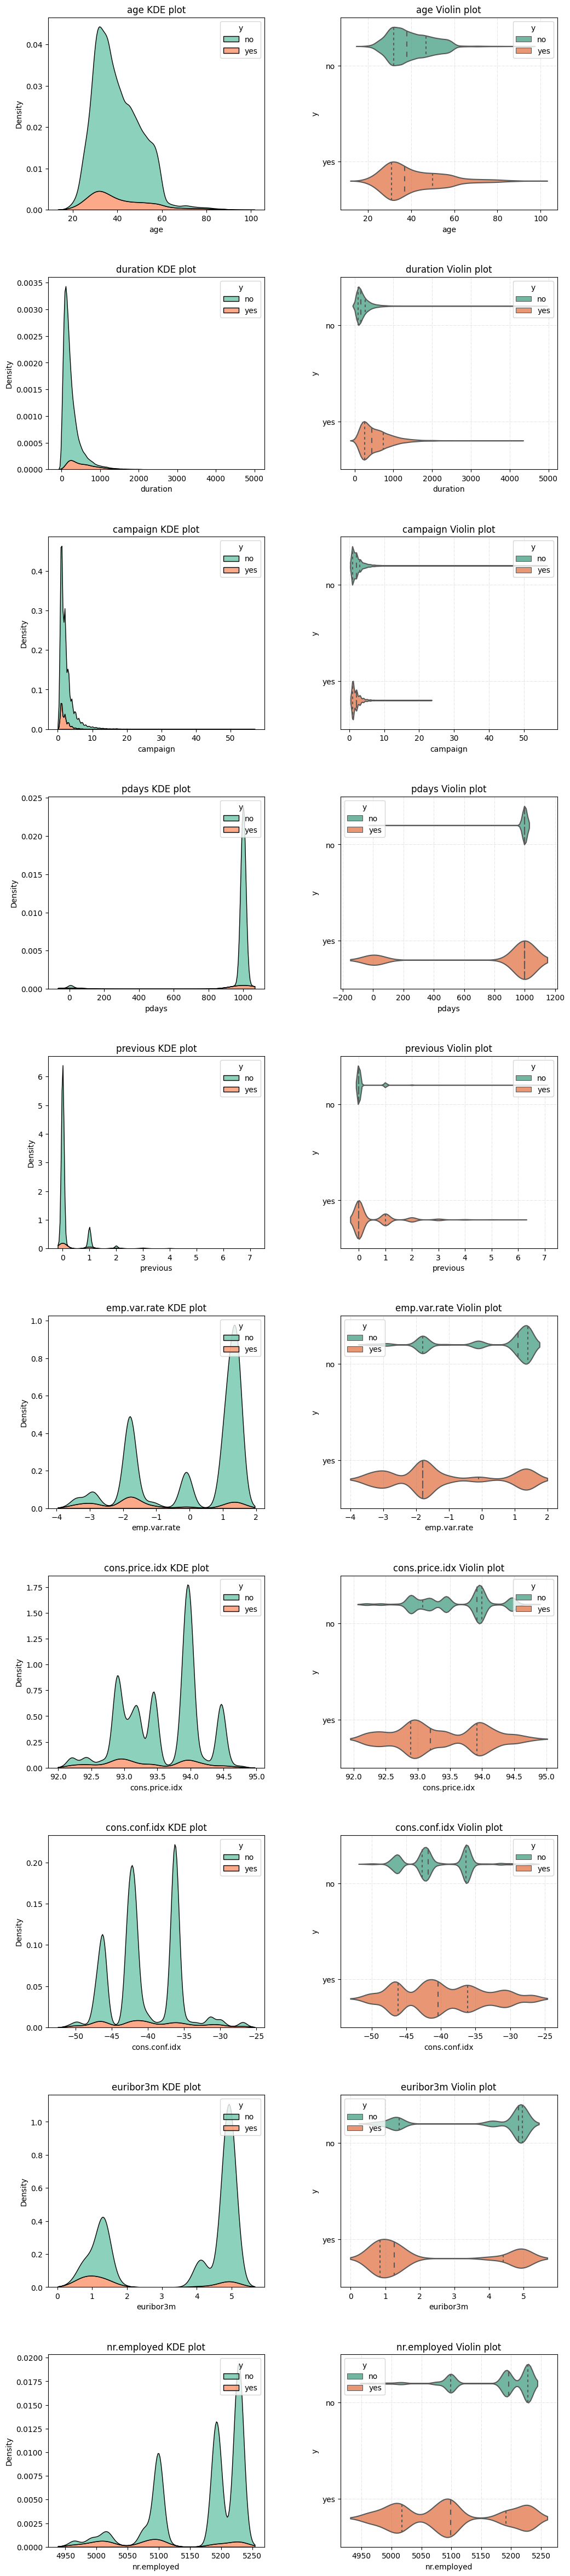

In [23]:
'''
Number of rows to plot. We will plot 3 figures in a row.
'''
num_cols = 2
num_rows = math.ceil(len(numeric_cols) / num_cols * 2)

fig, axes = plt.subplots(num_rows, num_cols, figsize = (6*num_cols, 6*num_rows))

row_idx = 0
col_idx = 0

for col in numeric_cols:
  # move to next row
  if col_idx == num_cols:
    row_idx += 1
    col_idx = 0

  # plot figure
  sns.kdeplot(ax=axes[row_idx, col_idx], data=df, x=col, hue='y',
              multiple="stack", palette='Set2', common_norm=True)
  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} KDE plot')

  col_idx += 1

  sns.violinplot(ax=axes[row_idx, col_idx], data=df, y='y', x=col, hue='y',
                 inner='quartile', showmeans=True, palette='Set2', scale="width")

  axes[row_idx, col_idx].set_title(f'{col} Violin plot')

  axes[row_idx, col_idx].grid(color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.3)

  col_idx += 1

# adjust distance between figures
plt.subplots_adjust(wspace=0.35,
                    hspace=0.35)

# fig.delaxes(axes[2,2])
# fig.delaxes(axes[2,3])

plt.show()

There are some hypotheses that can be generated from above:
- Customers with longer conservations tent to subscribe to the plan. **75%** of non-responsive group had conservations under approximately **4 mintues** while **75%** of responsive group had conservations above approximately **4 minutes**. (from **duration** feature)
- Customers who were contacted too much (more than **25** times) during the campaign are likely to reject the plan. (from **campaign** feature)
- When the consumer price index was low, customers tent subscribe to the plan. **25%** of non-responsive group and more than **30%** of the responsive group were at the time consumer price idx was around **-42**. When the value decreased to around **-46**, there was still **25%** of responsive group while only a few from non-responsive group (from **cons.price.idx** feature)
- Likewise, when the interest rate of Europe banks, the employment rate or the number of employment were low, more customers tent to subcribe to the plan. (since the median and quartile values of 2 customer groups were differed) (from **euribor3m**, **emp.var.rate** and **nr.employed** features)

### Bivariate Categorical features vs Target feature (Independent variable vs Dependent variable)

First we will use bar chart to investigate the different in number of each category between 2 customer groups.

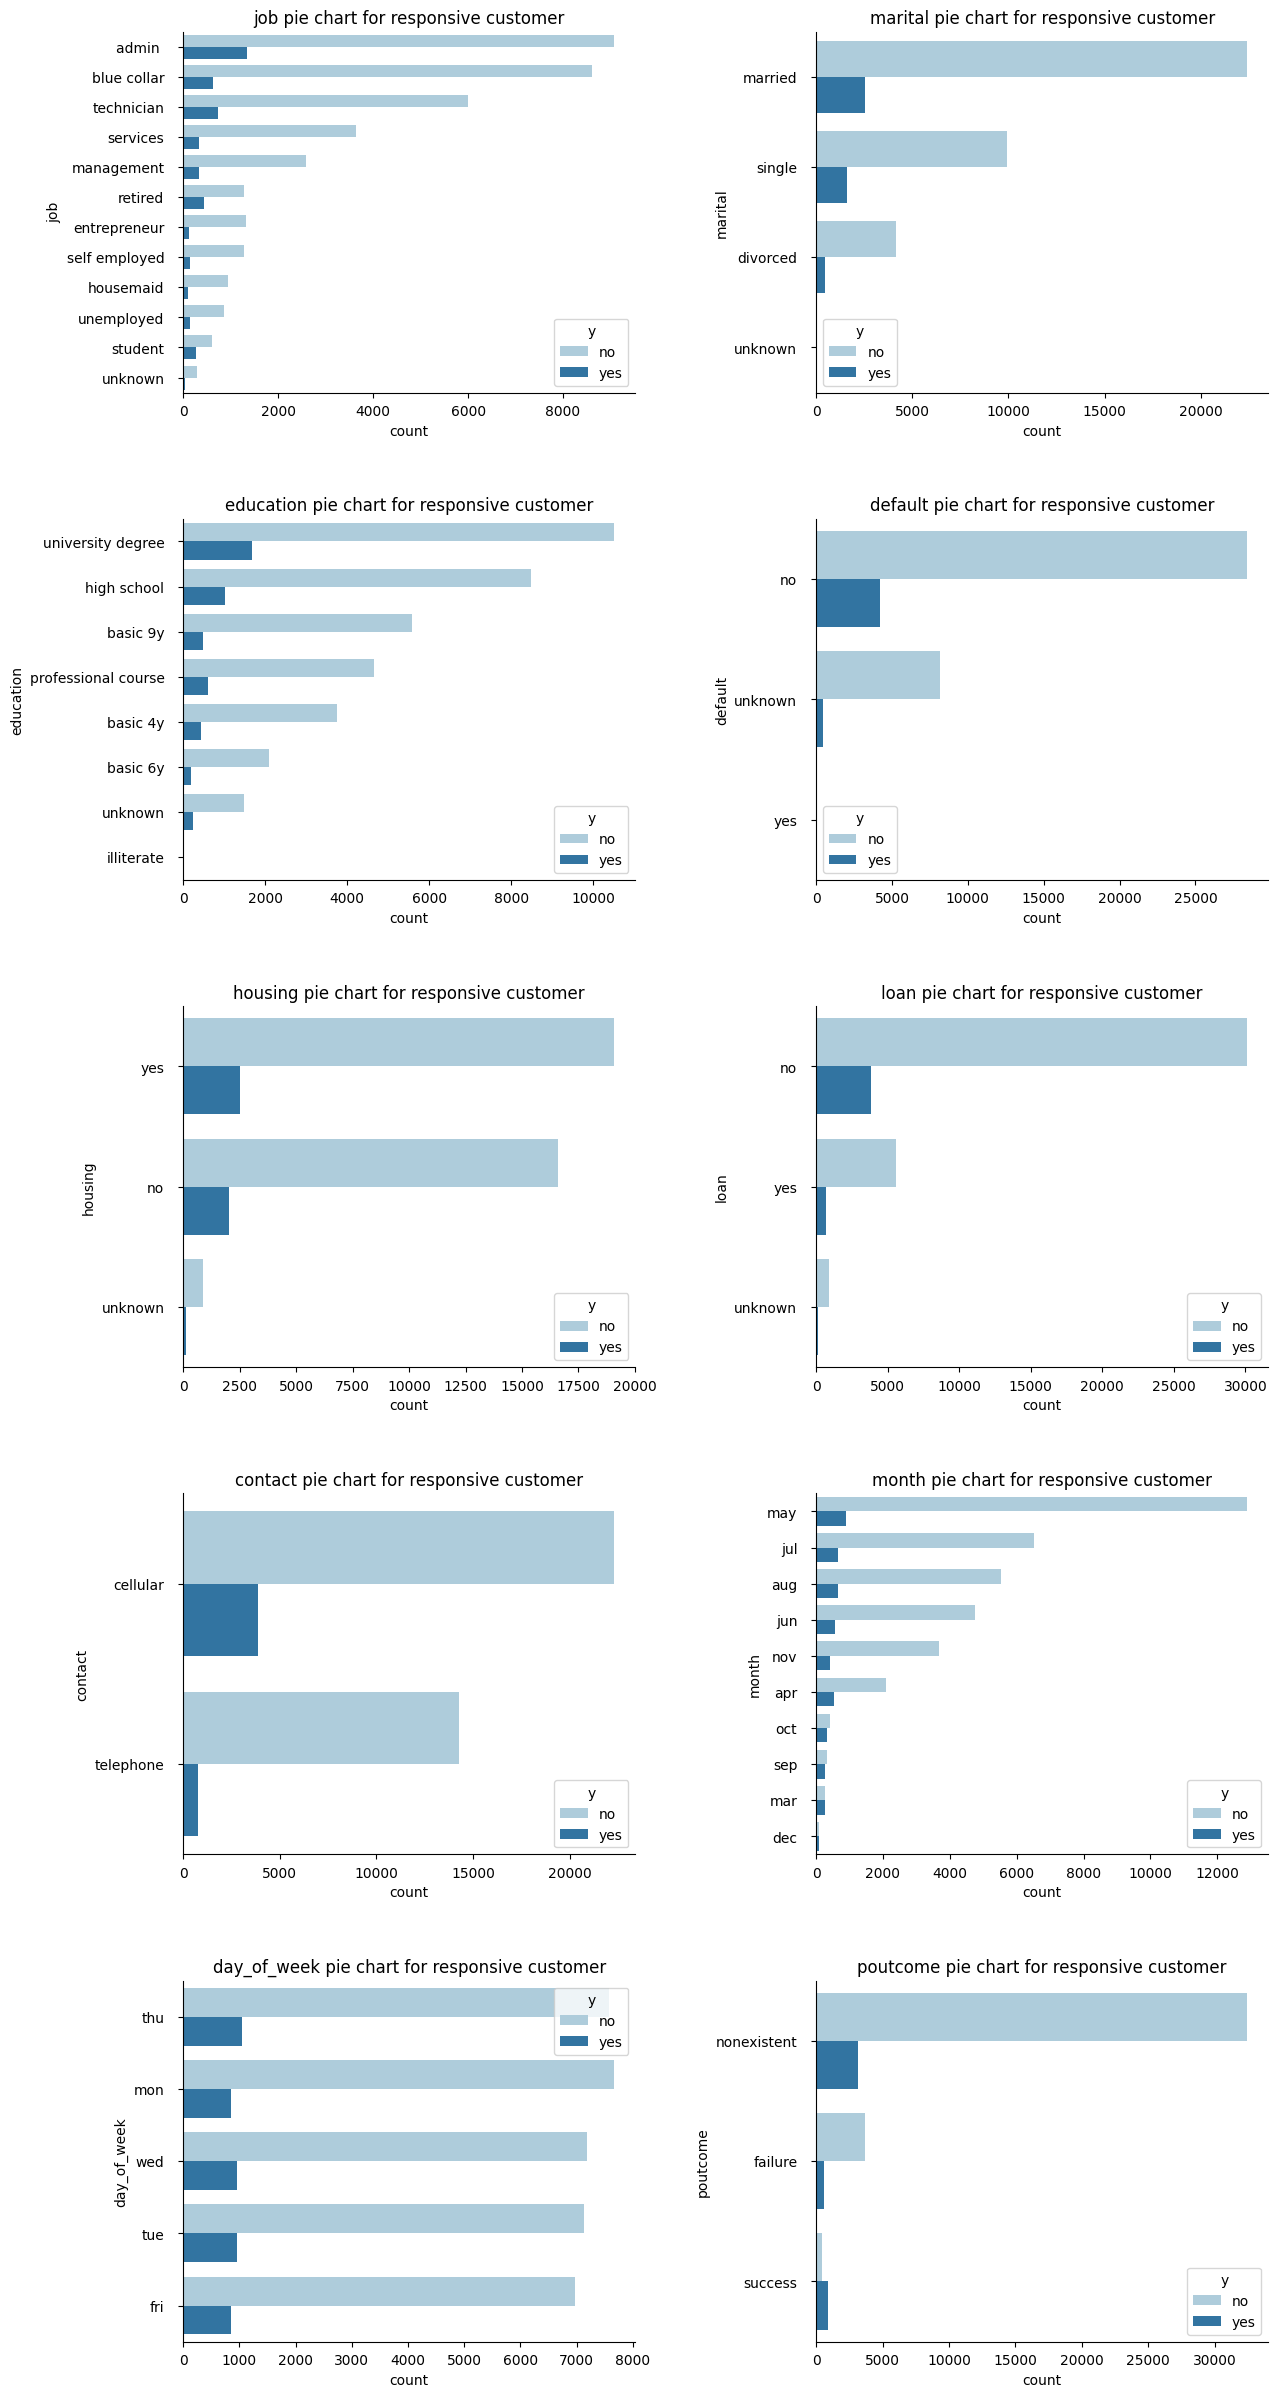

In [24]:
'''
Number of rows to plot. We will plot 3 figures in a row.
'''
num_cols = 2
num_rows = math.ceil(len(cate_cols) / num_cols) - 1

fig, axes = plt.subplots(num_rows, num_cols, figsize = (7*num_cols, 6*num_rows))

row_idx = 0
col_idx = 0

color_palette = sns.color_palette("Paired")

for col in cate_cols:
  if col == 'y':
    continue

  # move to next row
  if col_idx == num_cols:
    row_idx += 1
    col_idx = 0

  # Remove axes splines
  for s in ['top', 'right']:
      axes[row_idx, col_idx].spines[s].set_visible(False)

  # # Remove x, y Ticks
  # ax.xaxis.set_ticks_position('none')
  # ax.yaxis.set_ticks_position('none')

  # Add padding between axes and labels
  axes[row_idx, col_idx].xaxis.set_tick_params(pad = 5)
  axes[row_idx, col_idx].yaxis.set_tick_params(pad = 10)

  # plot
  sns.countplot(ax=axes[row_idx, col_idx], data=df, y=col,
              hue='y', palette = color_palette,
              order=df[col].value_counts().index)

  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} pie chart for responsive customer')

  col_idx += 1

# adjust distance between figures
plt.subplots_adjust(wspace=0.4,
                    hspace=0.35)

# fig.delaxes(axes[2,2])
# fig.delaxes(axes[2,3])

plt.show()

Since the dataset is imbalance in each category, we can plot the percentage of each category in each customer group, which can be visualized by pie chart

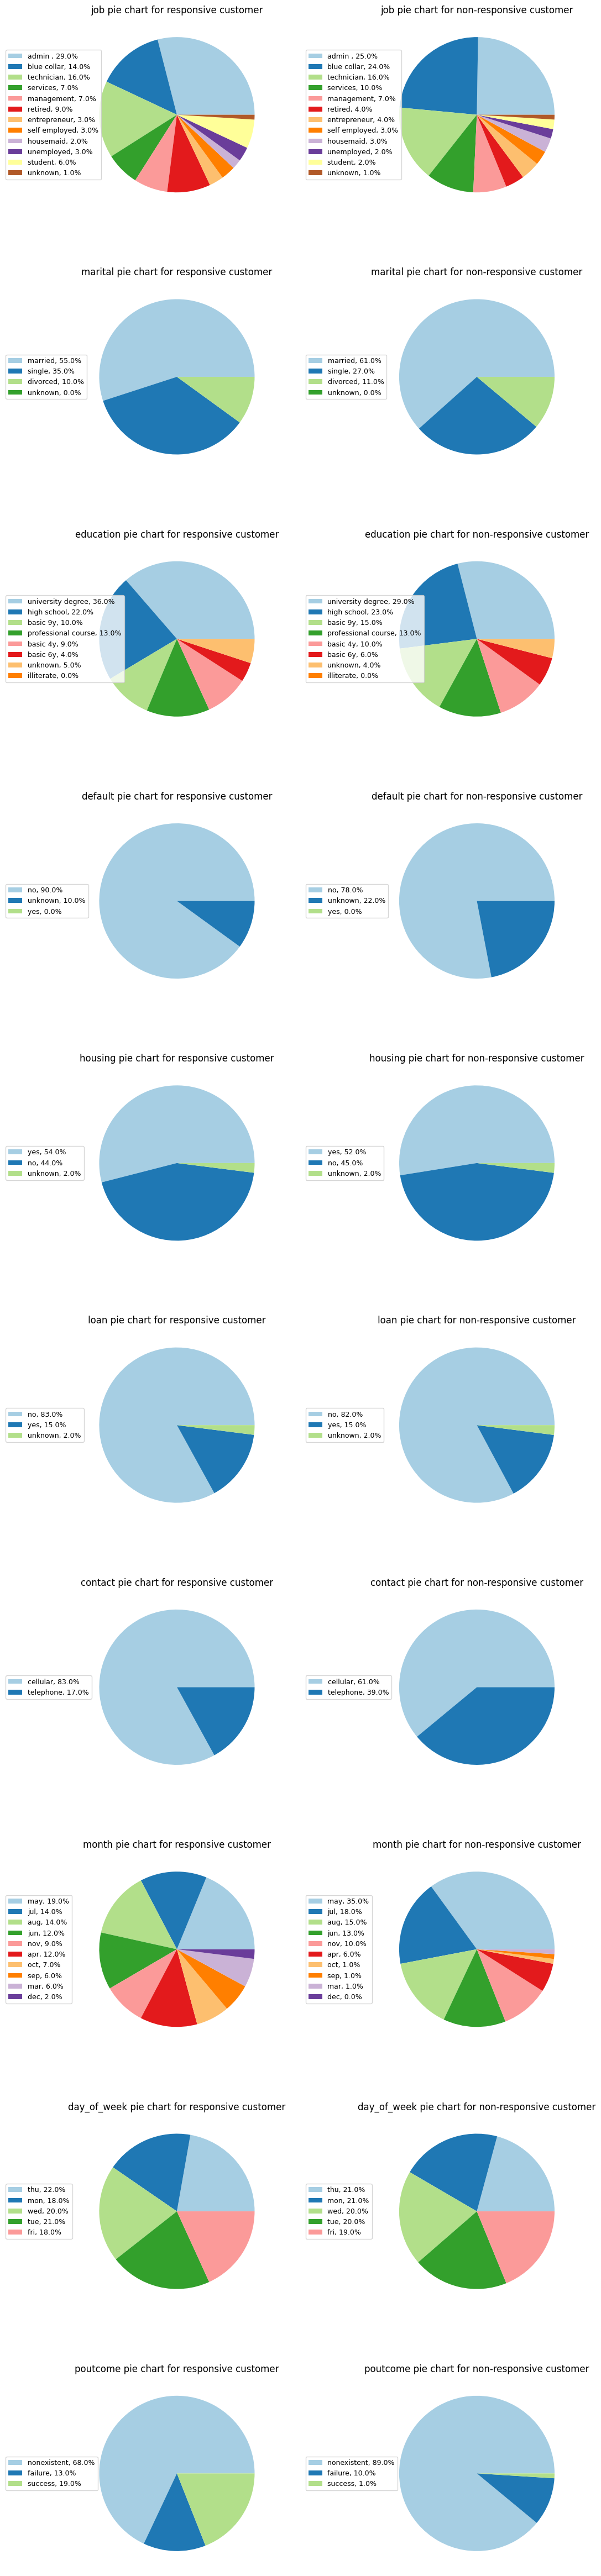

In [25]:
df_yes = df[df['y'] == 'yes']
df_no = df[df['y'] == 'no']

def cal_cate_percent(df, col, order):
  percents = []

  data_len = len(df)

  for label in order[:-1]:
    count = len(df[df[col] == label])
    percents.append(round(count/data_len, 2)*100)

  # ensure sum = 1
  last_count = len(df[df[col] == order[-1]])
  percents.append(round(last_count/data_len, 2)*100)

  return percents

'''
Number of rows to plot. We will plot 3 figures in a row.
'''
num_cols = 2
num_rows = math.ceil(len(cate_cols) / num_cols * 2) - 1

fig, axes = plt.subplots(num_rows, num_cols, figsize = (6*num_cols, 6*num_rows))

row_idx = 0
col_idx = 0

color_palette = sns.color_palette("Paired")

for col in cate_cols:
  if col == 'y':
    continue

  # move to next row
  if col_idx == num_cols:
    row_idx += 1
    col_idx = 0

  # reorder label in pie chart
  label_order = df[col].value_counts().index

  # calculate percentage list
  percent_ls_yes = cal_cate_percent(df_yes, col, label_order)
  percent_ls_no = cal_cate_percent(df_no, col, label_order)

  labels_yes = [f'{l}, {s:0.1f}%' for l, s in zip(label_order, percent_ls_yes)]
  labels_no = [f'{l}, {s:0.1f}%' for l, s in zip(label_order, percent_ls_no)]

  # plot figure
  # axes[row_idx, col_idx].pie(percent_ls_yes, labels=label_order, colors=color_palette)
  axes[row_idx, col_idx].pie(percent_ls_yes, colors=color_palette)
  # bbox_to_anchor=(0.35, .5)
  axes[row_idx, col_idx].legend(labels_yes, loc='center left',
                                bbox_to_anchor=(-0.4, .5), fontsize=9)

  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} pie chart for responsive customer')

  col_idx += 1

  # plot figure
  axes[row_idx, col_idx].pie(percent_ls_no, colors=color_palette)
  axes[row_idx, col_idx].legend(labels_no, loc='center left',
                                bbox_to_anchor=(-0.4, .5), fontsize=9)
  # set figure title
  axes[row_idx, col_idx].set_title(f'{col} pie chart for non-responsive customer')

  col_idx += 1

# adjust distance between figures
plt.subplots_adjust(wspace=0.4,
                    hspace=0.35)

# fig.delaxes(axes[2,2])
# fig.delaxes(axes[2,3])

plt.show()

- Customers who were contacted by telephone tent to reject the plan (**39%** of the non-responsive group and only **17%** of the responsive group) (from **contact** feature)
- Customers who already subscribed to the previous campaign are more likely to continue subscribe to the plan (**19%** of the the responsive group and only **1%** of the non-responsive group) (from **poutcome** feature)

### More Bivariate analysis (Independent variable vs Independent variable)

#### Correlation between numerical independent variables

Since the distribution of all numerical variables are non-normal distribution, using a **Spearman** correlation matrix is more suitable than **Pearson** correlation matrix. The **Pearson** method requires assumption about normal distribution, while the Spearman method is a non-parametric test and does not require normal distribution assumption.

<ipython-input-26-e9f520a7728c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


<Axes: >

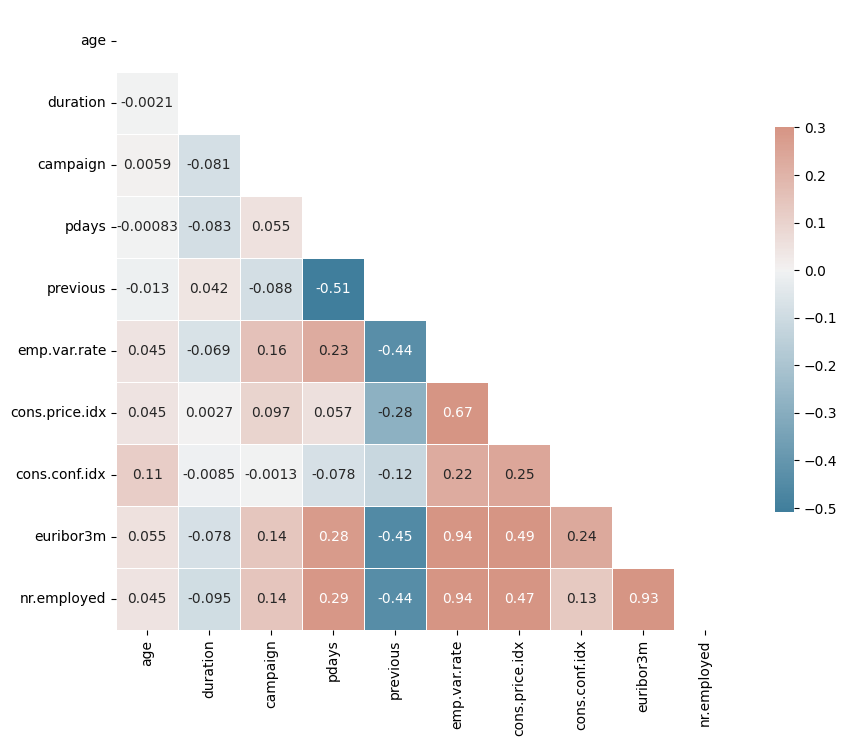

In [26]:
# sns.regplot(data=df, x='age', )
corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2")

The correlation values can range from **-1 to 1**, which indicates strong negative correlation to strong positive correlation. A negative value means a decrease in 1 variable can cause an incresae in the other variable. A negative value means an increase in 1 variable can cause an incresae in the other variable.

As can be seen from the above correlation matrix, very few variables have strong correlation (more than **0.9** or lower than **-0.9**).

**euribor3m**, **nr.employed** and **emp.var.rate** are 3 variables with very strong positive correlation with each other. These relationships will be noted for further experiments like feature selection (select only sub-group of the feature set), or evaluate the impact of them on specific models (Logistic Regression, Kmean-Clustering, ...)

### Hypotheses testing

#### Testing correlations between numerical variables with the target variable

Since the target variable is categorical data, in order to evaluate the relationship between numerical and categorical data, we can either use the **t-test** approach or **Mann-Whitney U** test approach.

However, since the numerical variables are non-normal distributed while the **t-test** requires normal distribution assumption, we will use the **Mann-Whitney U** approach as it does not require normal distribution assumption.

The significant value will be set to **0.05**, which indicate the probability that the Null hypothesis will be true (there is no correlation between 2 variables). If the **p-value** is lower than this threshold, we can reject the Null hypothesis and conclude that the correlation between 2 variables is statistically significant.

In [27]:
from scipy.stats import ttest_ind # for normal distribution
from scipy.stats import mannwhitneyu # for non normal distribution

for col in numeric_cols:
  subscribed_age = df[df['y'] == 'yes'][col]
  not_subscribed_age = df[df['y'] == 'no'][col]

  t_statistic, p_value = mannwhitneyu(subscribed_age, not_subscribed_age)

  if p_value < 0.05:
      print(f"The difference in {col} between subscribed and not subscribed groups is statistically significant.")
  # else:
  #     print("There is no statistically significant difference in 'age' between the groups.")

The difference in age between subscribed and not subscribed groups is statistically significant.
The difference in duration between subscribed and not subscribed groups is statistically significant.
The difference in campaign between subscribed and not subscribed groups is statistically significant.
The difference in pdays between subscribed and not subscribed groups is statistically significant.
The difference in previous between subscribed and not subscribed groups is statistically significant.
The difference in emp.var.rate between subscribed and not subscribed groups is statistically significant.
The difference in cons.price.idx between subscribed and not subscribed groups is statistically significant.
The difference in cons.conf.idx between subscribed and not subscribed groups is statistically significant.
The difference in euribor3m between subscribed and not subscribed groups is statistically significant.
The difference in nr.employed between subscribed and not subscribed groups

#### Testing correlations between categorical variables with the target variable and other categorical variables

For evaluate the correlation between 2 categorical variables, a **Chi-square test** of independence of variables in a contingency table will be performed.

Each categorical variables pair will be tested using a contigency table. The significant value will be set to **0.05**, which indicate the probability that the Null hypothesis will be true (there is no correlation between 2 variables). If the **p-value** is lower than this threshold, we can reject the Null hypothesis and conclude that the correlation between 2 variables is statistically significant.

The final result will be plot as a heatmap for easy interepreting.

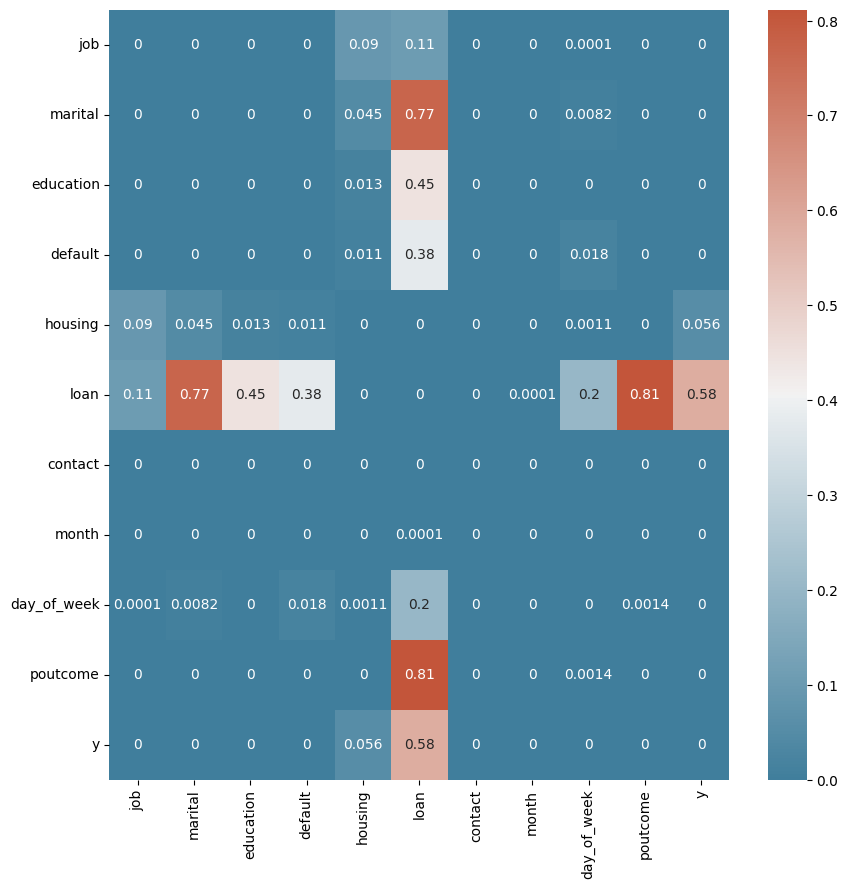

In [28]:
from scipy.stats import chi2_contingency
from collections import defaultdict
from matplotlib.patches import Rectangle

# Perform Chi-Square tests for all pairs of categorical columns
alpha = 0.05
# create a dict to generate p-value dataframe
p_values = defaultdict(list)

significant_idxs = []

for col1 in cate_cols:
  for col2 in cate_cols:
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    p_value = round(p_value, 4)

    if p_value < alpha:
      data_len = len(cate_cols)

      # # index from bottom left of the heatmap
      # row_idx = data_len - cate_cols.index(col2) - 1
      # col_idx = cate_cols.index(col1)

      # significant_idxs.append((col_idx, row_idx))

    p_values[col1].append(p_value)

p_matrix = pd.DataFrame(data=p_values, index=cate_cols)

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(p_matrix, annot=True, cmap=cmap, ax=ax)

# for index in significant_idxs:
#   ax.add_patch(Rectangle(index, 1, 1, fill=False, edgecolor='red', lw=2))

plt.show()


As can be seen from above, almost every categorical variable has association with each other and the target variable with **p-value** lower than **0.05**.

However, it seem like there is no statistically significant correlation between **housing**, **loan** features and target feature.

In [29]:
# hypothesis test between categorical variables and target variable

alpha = 0.05
for col in cate_cols:
  if col == 'y':
    continue
  contingency_table = pd.crosstab(df[col], df['y'])

  # Perform Chi-Squared test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  if p_value < alpha:
      print(f"There is a statistically significant relationship between {col} and subscription status.")


There is a statistically significant relationship between job and subscription status.
There is a statistically significant relationship between marital and subscription status.
There is a statistically significant relationship between education and subscription status.
There is a statistically significant relationship between default and subscription status.
There is a statistically significant relationship between contact and subscription status.
There is a statistically significant relationship between month and subscription status.
There is a statistically significant relationship between day_of_week and subscription status.
There is a statistically significant relationship between poutcome and subscription status.


# RESULTS AND CONCLUSIONS

### 1. Customer descriptions

- The average age of customers are around 40 years old. Most of them was graduated from an university or high school, before getting married and working as an admin or a worker.

- Almost customers are reconnected after nearly 3 years and were not interacted in the previous campaign, since most of them were not contacted in the previous campaign. *(from **pdays** and **previous** features)*

### 2. Economic situation
- During the campaign occured, the economic situation was not optimistic. There was a decrease in employment demand. The price was also deflated, which indicate an economic slowdown. All of these trends could be the reasons for customers' pessimism about the economy and personal financial. *(from **emp.var.rate**, **cons.price.idx** and **cons.conf.idx** features)*

### 3. Feature relationships

**Numerical features and Target features**
- Longer conservation durations tend to make customers subscribe to the plan.
- Meanwhile, customers also tend to subscribe to the plan when the econmic situation goes down.
- By using hypothesis testing, the relationship between every numerical features and target features are statistically significant.

**Categorical features and Target features**
- Customers who already subscribed to the previous campaign or were contacted by celludar are more likely to continue subscribe to the plan.
- By using hypothesis testing, whether a customer has a housing or personal loan is not likely a factor that affect him/her decisions. On the other hand, the relationship between other categorical features and target features are statistically significant.

**Between independent features**
- Features which indicate economic situation are highly correlated (**emp.var.rate**, **nr.employed** and **euribor3m**). These features can be considered drop to avoid causing Machine Learning model unstable.
- Moreover, there are deeper relationships between most of categorical features in the dataset. For further analysis, we can use PCA (Principal Component Analysis) to combine these features and reduce the feature dimensions, which could speedup the converenge of Machine Learning models and enhance their performance.

### 4. Future works
- Since the outliers in numerical features are still kept due to lack of evidence, they we be used for future model experiments to determined wether to keep these samples or not.
- Feature selection or Feature extraction methods (PCA, ...) can be performed to get more optimal feature set.
